In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [3]:
file=pd.read_csv('/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv')
import pandas as pd

# Assuming 'df' is your DataFrame
# Convert 'Date' column to datetime if it is not already in datetime format
file['Date'] = pd.to_datetime(file['Date'])

# Extract the maximum year from the 'Date' column
max_year = file['Date'].dt.year.max()
print(f"The maximum year in the dataset is {max_year}.")


The maximum year in the dataset is 2021.


In [12]:
file.head()
file.columns
file.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5306 non-null   object 
 1   Series              5306 non-null   object 
 2   Prev Close          5306 non-null   float64
 3   Open                5306 non-null   float64
 4   High                5306 non-null   float64
 5   Low                 5306 non-null   float64
 6   Last                5306 non-null   float64
 7   Close               5306 non-null   float64
 8   VWAP                5306 non-null   float64
 9   Volume              5306 non-null   int64  
 10  Turnover            5306 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4797 non-null   float64
 13  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 621.8+ KB


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5306
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -26731.400
Date:                Fri, 27 Oct 2023   AIC                          53474.800
Time:                        09:46:50   BIC                          53514.258
Sample:                             0   HQIC                         53488.588
                               - 5306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0078      0.011     -0.679      0.497      -0.030       0.015
ar.L2         -0.0049      0.018     -0.272      0.786      -0.040       0.030
ar.L3          0.0001      0.026      0.004      0.9

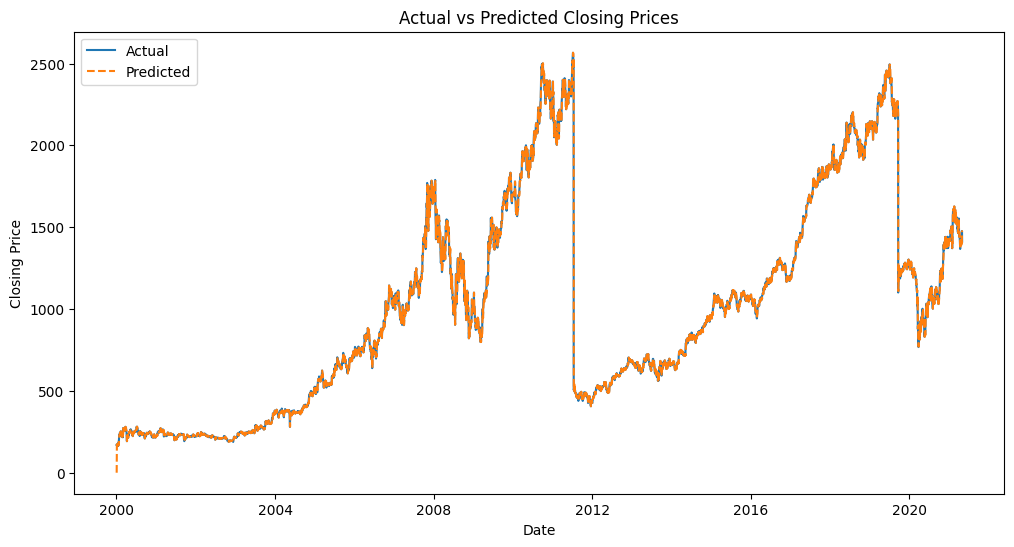

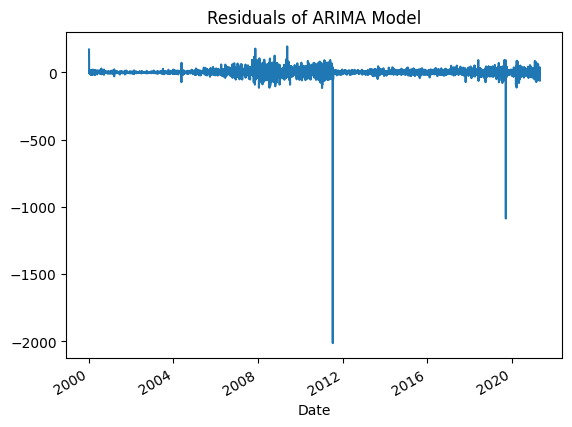

Mean Squared Error (MSE): 1399.1877961848404


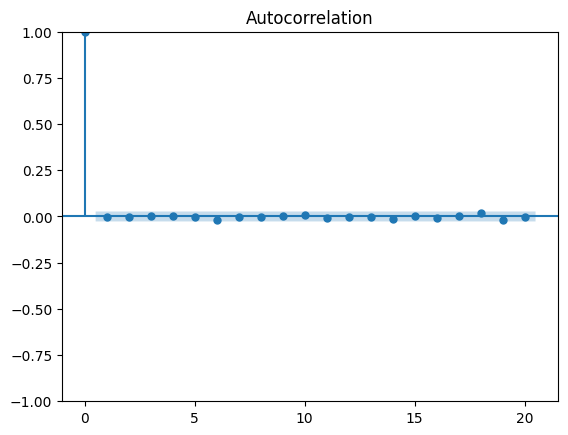

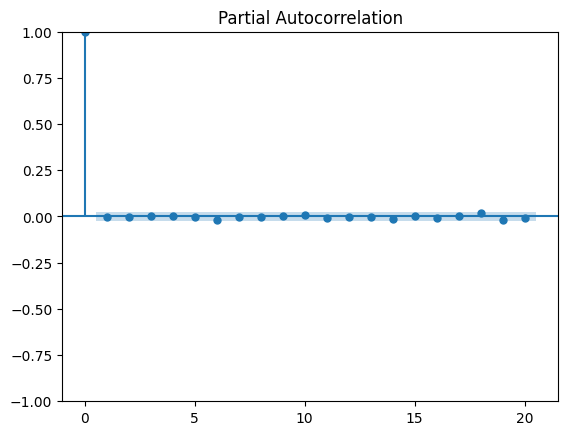

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file = pd.read_csv('/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv')

# Convert the 'Date' column to datetime type
file['Date'] = pd.to_datetime(file['Date'])

# Set the 'Date' column as the index
file.set_index('Date', inplace=True)

# Fit an ARIMA model
# Example of fitting an ARIMA model
# Specify the order of the ARIMA model (p, d, q)
p, d, q = 5, 1, 0
model_arima = ARIMA(file['Close'], order=(p, d, q))
model_fit_arima = model_arima.fit()

# Get the summary of the model
print(model_fit_arima.summary())

# You can then use this fitted model for predictions and further analysis
# Use the fitted ARIMA model for making predictions
predictions = model_fit_arima.predict(typ='levels')

# Visualize the original data and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(file.index, file['Close'], label='Actual')
plt.plot(file.index, predictions, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Conduct further analysis using the fitted model
# For example, you can calculate the residuals and perform residual analysis
residuals = file['Close'] - predictions
residuals.plot(title='Residuals of ARIMA Model')
plt.show()

# You can also evaluate the performance of the model using various metrics
# For instance, calculate the mean squared error (MSE) or the root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(file['Close'], predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Further analyze the residuals for any patterns or autocorrelation
# You can use ACF and PACF plots to identify any remaining patterns in the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=20)d
plot_pacf(residuals, lags=20)
plt.show()

# Explore more advanced analysis and fine-tune the model based on the results and insights gained


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/p

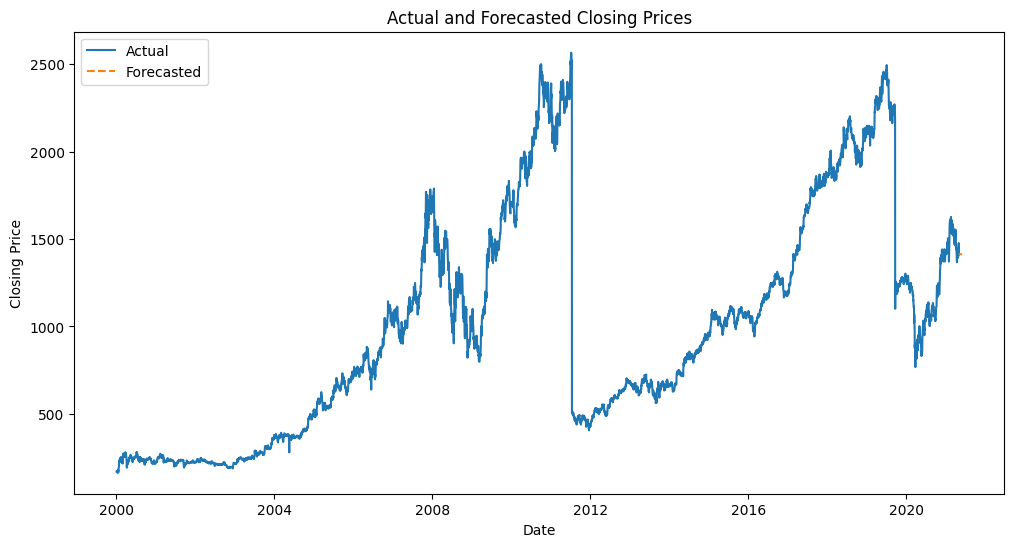

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file = pd.read_csv('/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv')

# Convert the 'Date' column to datetime type
file['Date'] = pd.to_datetime(file['Date'])

# Set the 'Date' column as the index
file.set_index('Date', inplace=True)

# Specify the frequency for the date index
file.index = pd.DatetimeIndex(file.index, freq=file.index.inferred_freq)

# Fit an ARIMA model
# Example of fitting an ARIMA model
# Specify the order of the ARIMA model (p, d, q)
p, d, q = 5, 1, 0
model_arima = ARIMA(file['Close'], order=(p, d, q))
model_fit_arima = model_arima.fit()

# Make future predictions
forecast_steps = 30  # Adjust the number of steps according to your requirement
forecast_values = model_fit_arima.forecast(steps=forecast_steps)

# Create an index for the forecasted values
forecast_index = pd.date_range(file.index[-1], periods=forecast_steps + 1, freq=file.index.inferred_freq)[1:]

# Visualize the original data along with the predicted and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(file.index, file['Close'], label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecasted', linestyle='--')
plt.title('Actual and Forecasted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



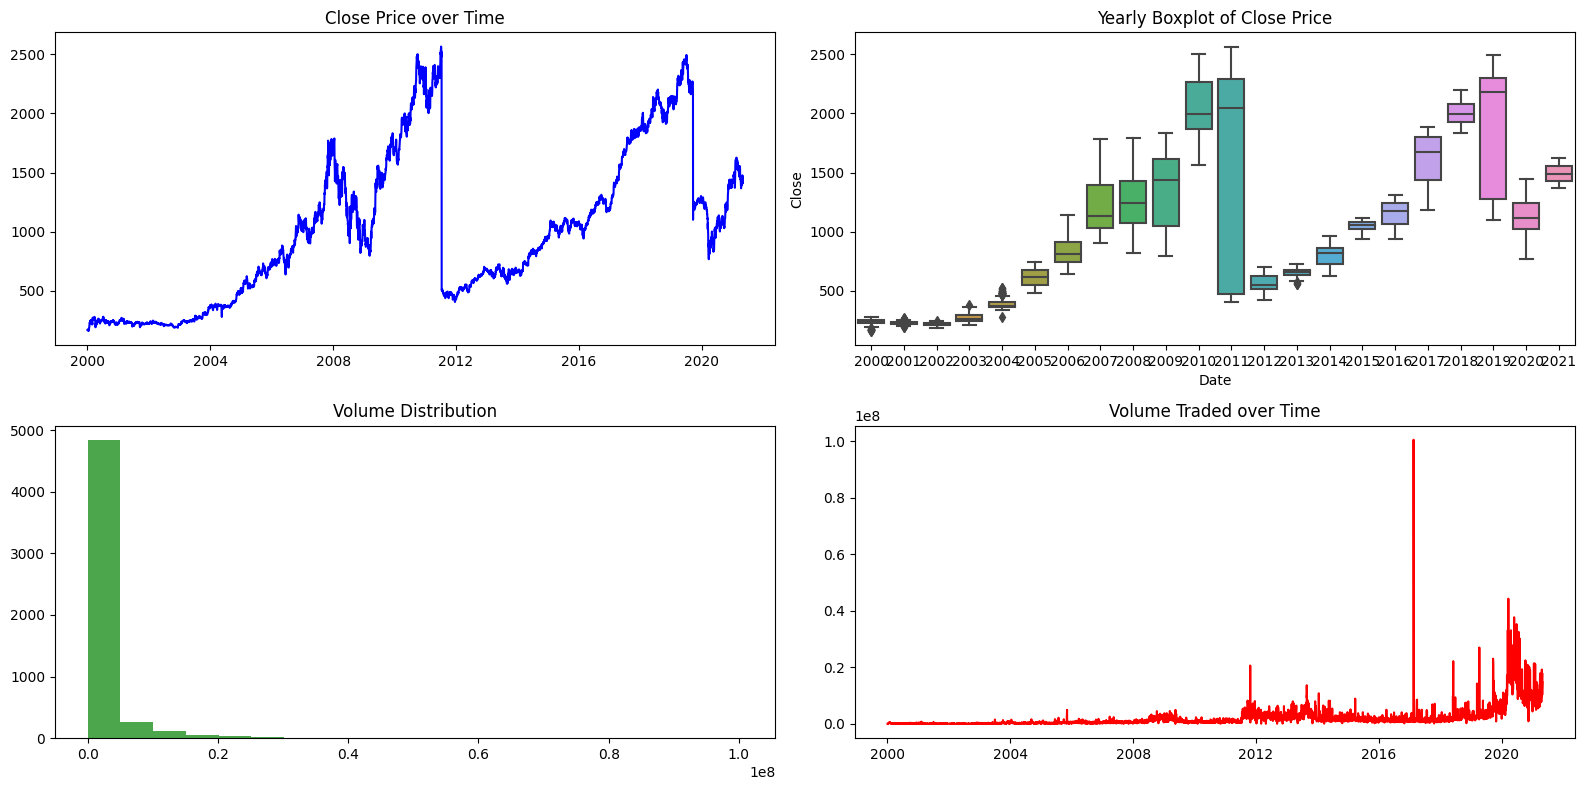

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file = pd.read_csv('/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv')
file['Date'] = pd.to_datetime(file['Date'])
file.set_index('Date', inplace=True)

# Plotting different graphs for analysis
plt.figure(figsize=(16, 8))

# Line plot for 'Close' price
plt.subplot(2, 2, 1)
plt.plot(file.index, file['Close'], color='b')
plt.title('Close Price over Time')

# Box plot for 'Close' price
plt.subplot(2, 2, 2)
sns.boxplot(x=file.index.year, y='Close', data=file)
plt.title('Yearly Boxplot of Close Price')

# Histogram of 'Volume'
plt.subplot(2, 2, 3)
plt.hist(file['Volume'], bins=20, color='g', alpha=0.7)
plt.title('Volume Distribution')

# Line plot for 'Volume' over time
plt.subplot(2, 2, 4)
plt.plot(file.index, file['Volume'], color='r')
plt.title('Volume Traded over Time')

plt.tight_layout()
plt.show()


so basically something happened in 2011-2012 that the stocks which were skyrocketted were brought down to its lowest  because of the msci indices i think 

In [23]:
# Forecast for the year 2023
forecast_period = 12 # Assuming you want to forecast for 12 months

# Make predictions for the next 'forecast_period' months
forecast = model_fit_arima.get_forecast(steps=forecast_period)

# Extract predicted values
predicted_values = forecast.predicted_mean

# Print the predicted values for 2023
print(f"Predicted values for 2023:\n{predicted_values}")


Predicted values for 2023:
5306    1413.143022
5307    1412.837711
5308    1411.967372
5309    1411.818852
5310    1413.161222
5311    1413.131444
5312    1413.128242
5313    1413.147217
5314    1413.155993
5315    1413.125973
5316    1413.126812
5317    1413.127103
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


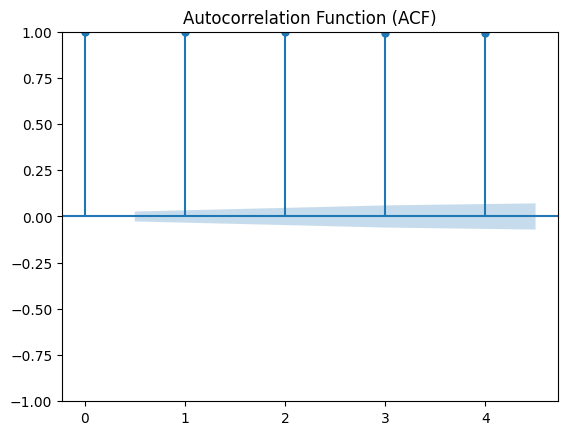

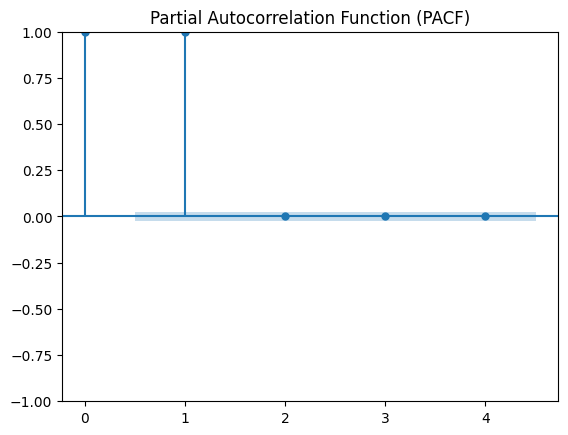

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'data' is the time series data
# Assuming 'lags' is the number of lags to consider

# Plotting ACF
plot_acf(file, lags=4)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plotting PACF
plot_pacf(file, lags=4)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


      First and foremost let’s talk about the major difference in the models the first major difference notice is the number of parameters in ARMA is  no of parameters which does not include the D or the I term that we talk about which basically stands for the number of times you have to differentiate the order of the derivative that is used to make the series stationary.
Arma is used  when the data points are not dependent on time What is the terms of stock analysis arma can’t be used since the stock volumes are dependent on time.
For time-dependent data such as stock prices, ARIMA (AutoRegressive Integrated Moving Average) or other more sophisticated models might be more suitable. ARIMA models take into account the differencing operation, which helps in making the time series data stationary before applying the autoregressive and moving average components. Additionally, other models like GARCH (Generalized AutoRegressive Conditional Heteroskedasticity) or its variants are often used in financial time series analysis, as they can capture the volatility clustering and other characteristics specific to financial data.
